In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df = pd.read_csv('wine.data.csv')
first_column = df.iloc[:, 0]  # Gets all rows for the fourth column (index starts at 0)
counts = first_column.value_counts()
print(counts)

Class
2    71
1    59
3    48
Name: count, dtype: int64


In [4]:
df_filtered = df.iloc[0:36]
first_column = df_filtered.iloc[:, 0]  # Gets all rows for the fourth column (index starts at 0)
counts = first_column.value_counts()
print(counts)

Class
1    36
Name: count, dtype: int64


In [5]:
df_filtered2 = df.iloc[59:165]
first_column = df_filtered2.iloc[:, 0]  # Gets all rows for the fourth column (index starts at 0)
counts = first_column.value_counts()
print(counts)

Class
2    71
3    35
Name: count, dtype: int64


In [6]:
combined_df = pd.concat([df_filtered2, df_filtered], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
combined_df.to_csv("combined_data.csv", index=False)
first_column = combined_df.iloc[:, 0]  # Gets all rows for the fourth column (index starts at 0)
counts = first_column.value_counts()
print(counts)

Class
2    71
1    36
3    35
Name: count, dtype: int64


In [7]:
df1 = pd.read_csv('combined_data.csv')
df1['Class'] = df1['Class'].apply(lambda x: 0 if x != 2 else 2)
first_column = df1.iloc[:, 0]  # Gets all rows for the fourth column (index starts at 0)
counts = first_column.value_counts()
print(counts)

Class
2    71
0    71
Name: count, dtype: int64


In [8]:
X = torch.tensor(df1[['Alcohol', 'Malic acid']].values, dtype=torch.float)
y = torch.tensor(df1['Class'].values, dtype = torch.float)
torch.manual_seed(123) 
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)   # y.size(0) =178
X, y = X[shuffle_idx], y[shuffle_idx]
percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

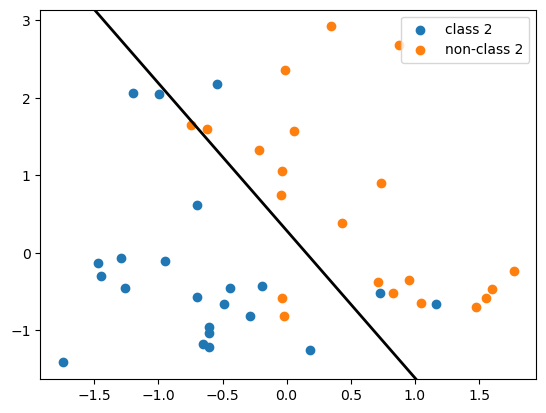

In [15]:
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], label='class 2')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='non-class 2')
plt.axline((0, model.bias[0]+model.weights[0][0]), (model.weights[1][0]-model.weights[0][0], model.weights[0][0]), linewidth=2, color='black')

plt.legend()
plt.show()


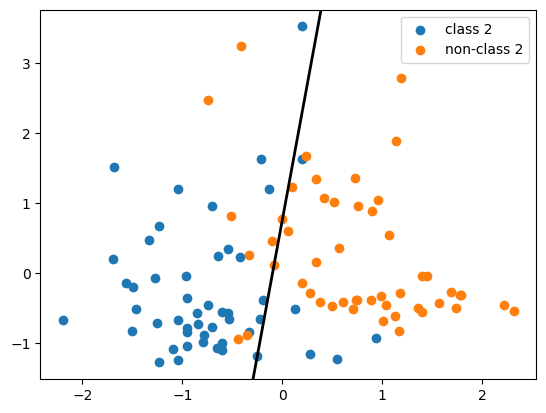

In [16]:
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], label='class 2')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='non-class 2')
plt.axline((0, model.bias[0]+0.345 *model.weights[0][0]), (model.weights[1][0], model.weights[0][0]), linewidth=2, color='black')
# plt.axvline(x = model.bias[0], ymin = fmodel.weights[0][0], ymax =model.weights[1][0] , color ='black') 
plt.legend()
plt.show()


In [11]:
class Adaline1():
    def __init__(self, num_inputs):
        self.num_inputs = num_inputs
        self.weights = torch.zeros(num_inputs, 1, 
                                   dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)

    def forward(self, x):
        netinputs = torch.add(torch.mm(x, self.weights), self.bias)
        activations = netinputs
        return activations.view(-1)
        
    def backward(self, x, yhat, y):  
        
        grad_loss_yhat = 2*(yhat - y)
        
        grad_yhat_weights = x
        grad_yhat_bias = 1.
        
        grad_loss_weights = torch.mm(grad_yhat_weights.t(),
                                         grad_loss_yhat.view(-1, 1)) / y.size(0)

        grad_loss_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)
        
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias

In [12]:


def loss(yhat, y):
    return torch.mean(0.5*(yhat - y)**2)


def train(model, x, y, num_epochs,
          learning_rate=0.01, seed=123, minibatch_size=10):
    cost = []
    
    torch.manual_seed(seed)
    for e in range(num_epochs):
        
        #### Shuffle epoch
        shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
        minibatches = torch.split(shuffle_idx, minibatch_size)
        
        for minibatch_idx in minibatches:

            #### Compute outputs ####
            yhat = model.forward(x[minibatch_idx])

            #### Compute gradients ####
            negative_grad_w, negative_grad_b = \
                model.backward(x[minibatch_idx], yhat, y[minibatch_idx])

            #### Update weights ####
            model.weights += learning_rate * negative_grad_w
            model.bias += learning_rate * negative_grad_b
            
            #### Logging ####
            minibatch_loss = loss(yhat, y[minibatch_idx])
            print('    Minibatch MSE: %.3f' % minibatch_loss)

        #### Logging ####
        yhat = model.forward(x)
        curr_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)

    return cost

In [13]:
model = Adaline1(num_inputs=X_train.size(1))
cost = train(model, 
             X_train, y_train.float(),
             num_epochs=30,
             learning_rate=0.1,
             seed=123,
             minibatch_size=20)

    Minibatch MSE: 0.600
    Minibatch MSE: 0.997
    Minibatch MSE: 0.473
    Minibatch MSE: 0.460
    Minibatch MSE: 0.440
Epoch: 001 | MSE: 0.27337
    Minibatch MSE: 0.230
    Minibatch MSE: 0.383
    Minibatch MSE: 0.251
    Minibatch MSE: 0.192
    Minibatch MSE: 0.143
Epoch: 002 | MSE: 0.20943
    Minibatch MSE: 0.315
    Minibatch MSE: 0.111
    Minibatch MSE: 0.198
    Minibatch MSE: 0.134
    Minibatch MSE: 0.316
Epoch: 003 | MSE: 0.20642
    Minibatch MSE: 0.196
    Minibatch MSE: 0.255
    Minibatch MSE: 0.122
    Minibatch MSE: 0.263
    Minibatch MSE: 0.228
Epoch: 004 | MSE: 0.20456
    Minibatch MSE: 0.164
    Minibatch MSE: 0.168
    Minibatch MSE: 0.247
    Minibatch MSE: 0.328
    Minibatch MSE: 0.152
Epoch: 005 | MSE: 0.20457
    Minibatch MSE: 0.375
    Minibatch MSE: 0.152
    Minibatch MSE: 0.130
    Minibatch MSE: 0.126
    Minibatch MSE: 0.256
Epoch: 006 | MSE: 0.20453
    Minibatch MSE: 0.166
    Minibatch MSE: 0.153
    Minibatch MSE: 0.278
    Minibatch MSE: 

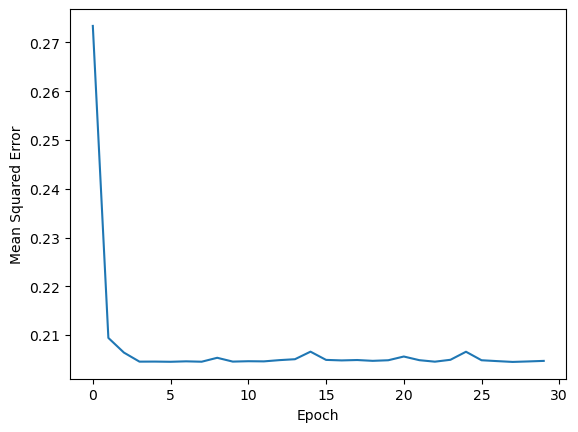

In [14]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [124]:
print('Weights', model.weights[1][0])
print('Weights', model.weights[0][0])

print('Bias', model.bias[0])

Weights tensor(-0.2133)
Weights tensor(-0.7332)
Bias tensor(0.9734)
